### DIABETES PREDICTION USING MACHINE LEARNING TECHNIQUES

#### Variable Description

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

### PROBLEM STATEMENT: 
* To perform classification analysis on Diabetes dataset and predict whether the patient have diabetes or not. Perform any two classification algorithms and compare the accuracy.

### DATA PREPROCESSING

* Importing pandas,numpy,matplotlib,Seaborn module and install pandas profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* Importing diabetes dataset and display the data

In [2]:
df=pd.read_csv("./diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

* Check whether there are any missing values or Nan values and replace them with median

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Notice that the attributes - Glucose, BloodPressure, SkinThickness, Insulin and BMI are having a minimum value of 0. This value can not be valid under any circumstance.
* Replacing 0 values with NAN

In [7]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

* We can now replace the np.nan values with the median values of the attributes.

In [8]:
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

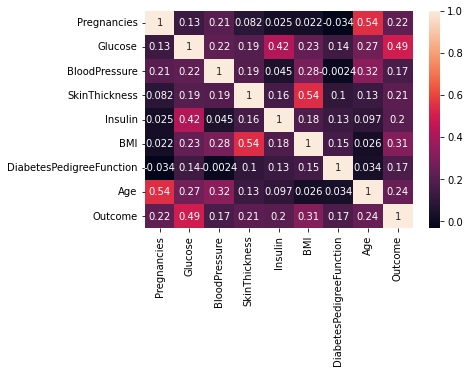

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### DATA VISUALIZATION

In [13]:
def hist_count(column, data):
    if column in data:
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, data=data)
        plt.xticks(rotation = 90)
        plt.suptitle(column, fontsize=20)
        plt.show()
    plt.show()

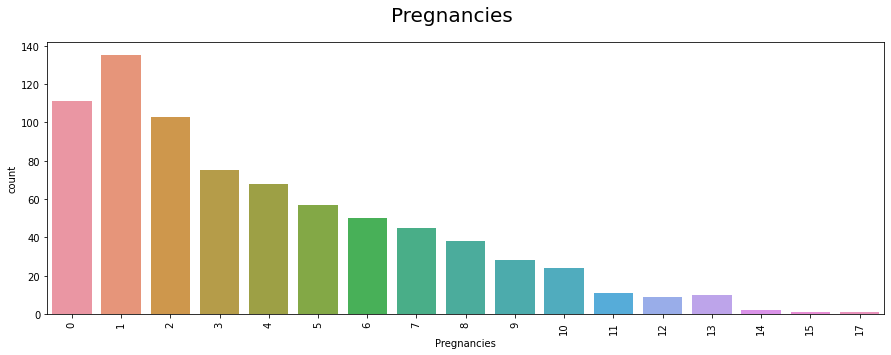

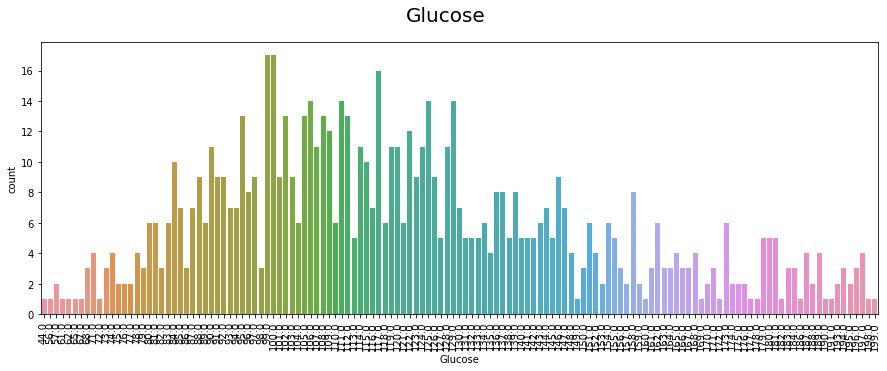

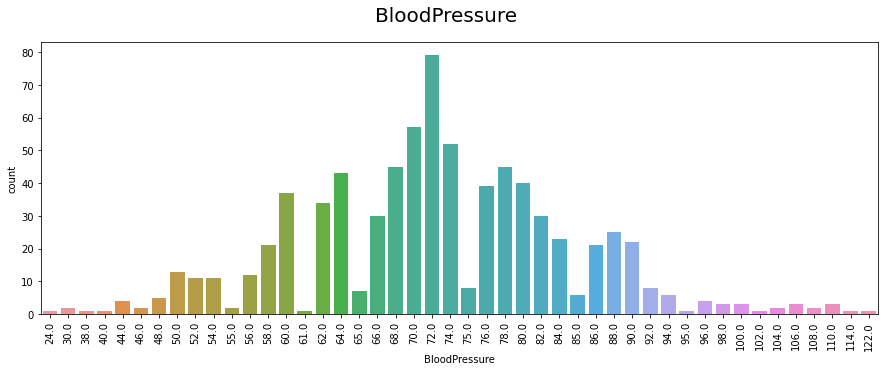

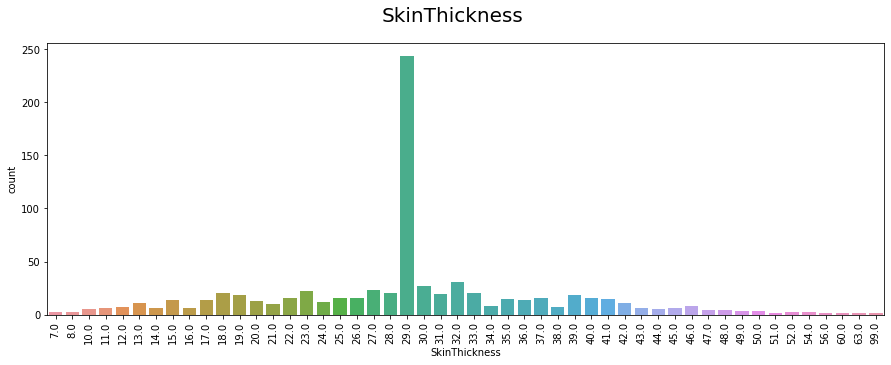

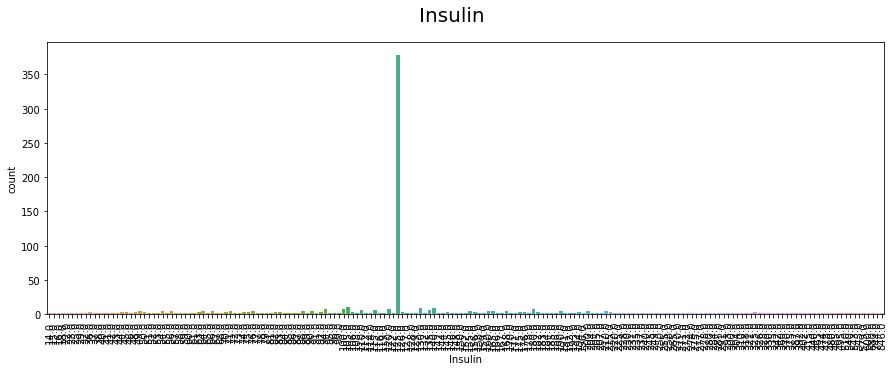

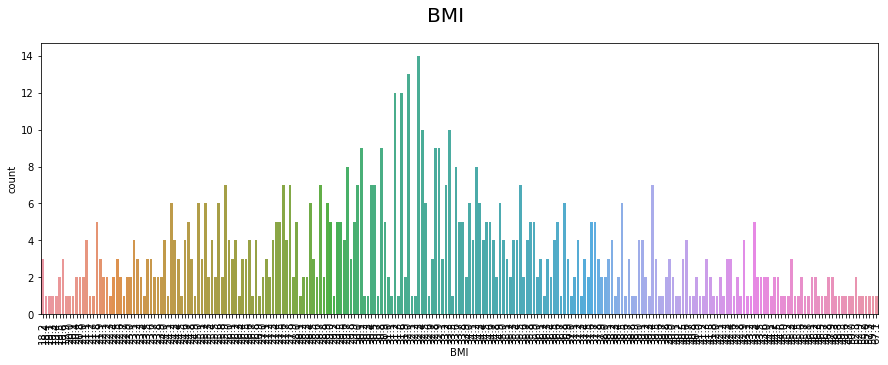

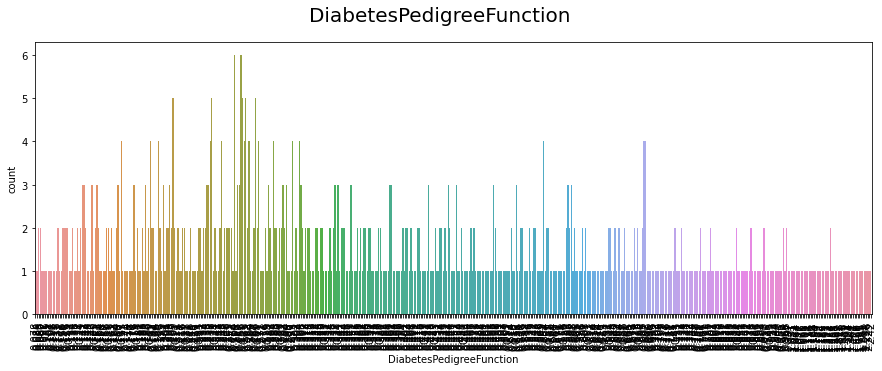

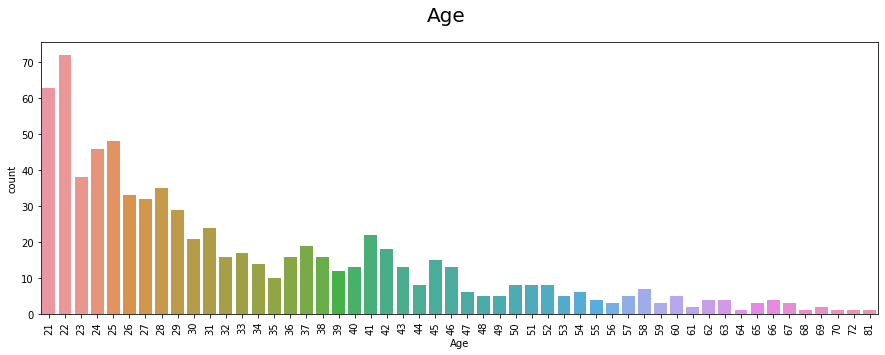

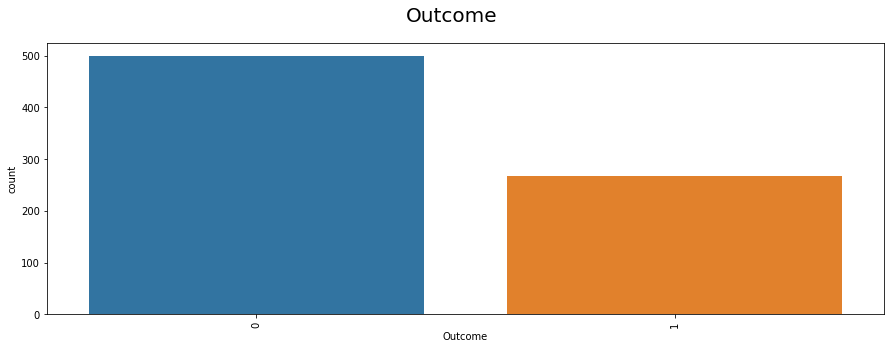

In [14]:
for column in df.columns:
    hist_count(column,df)

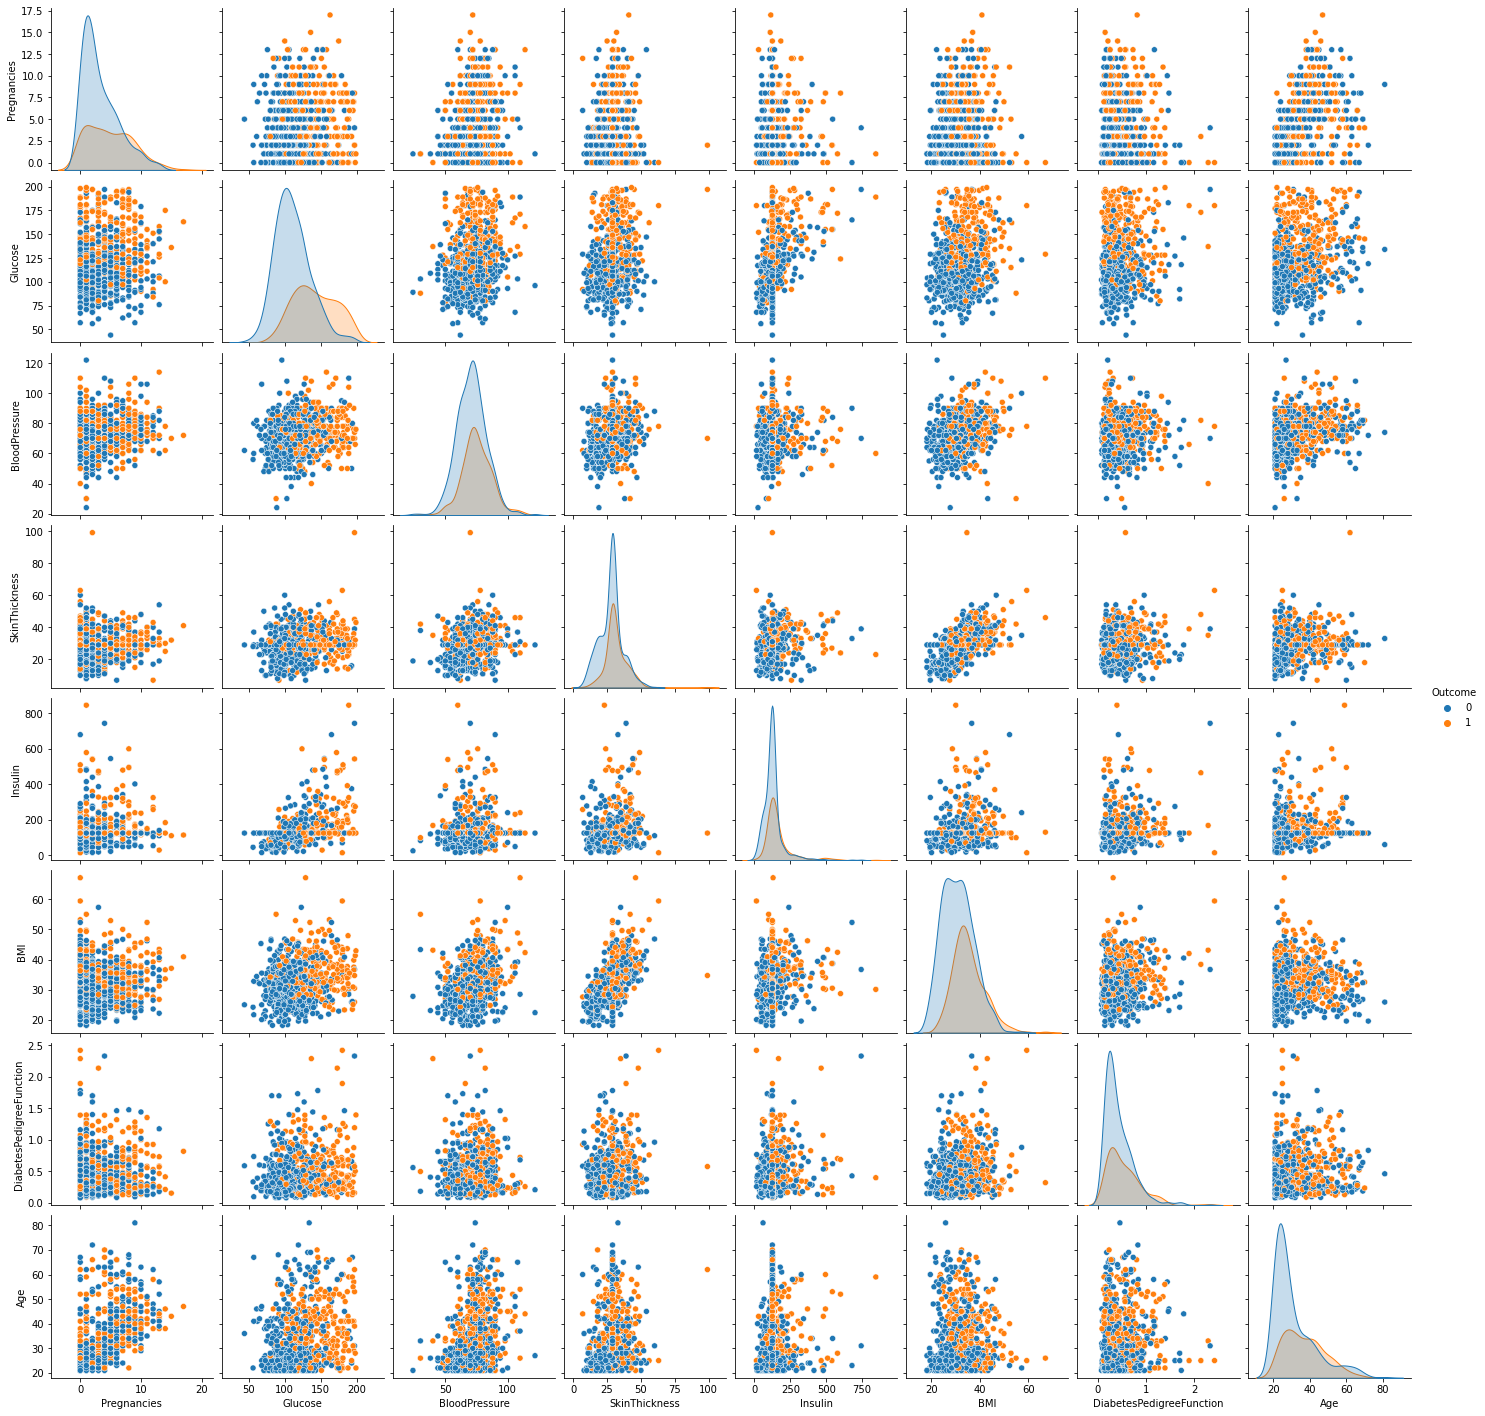

In [15]:
sns.pairplot(df,hue='Outcome')

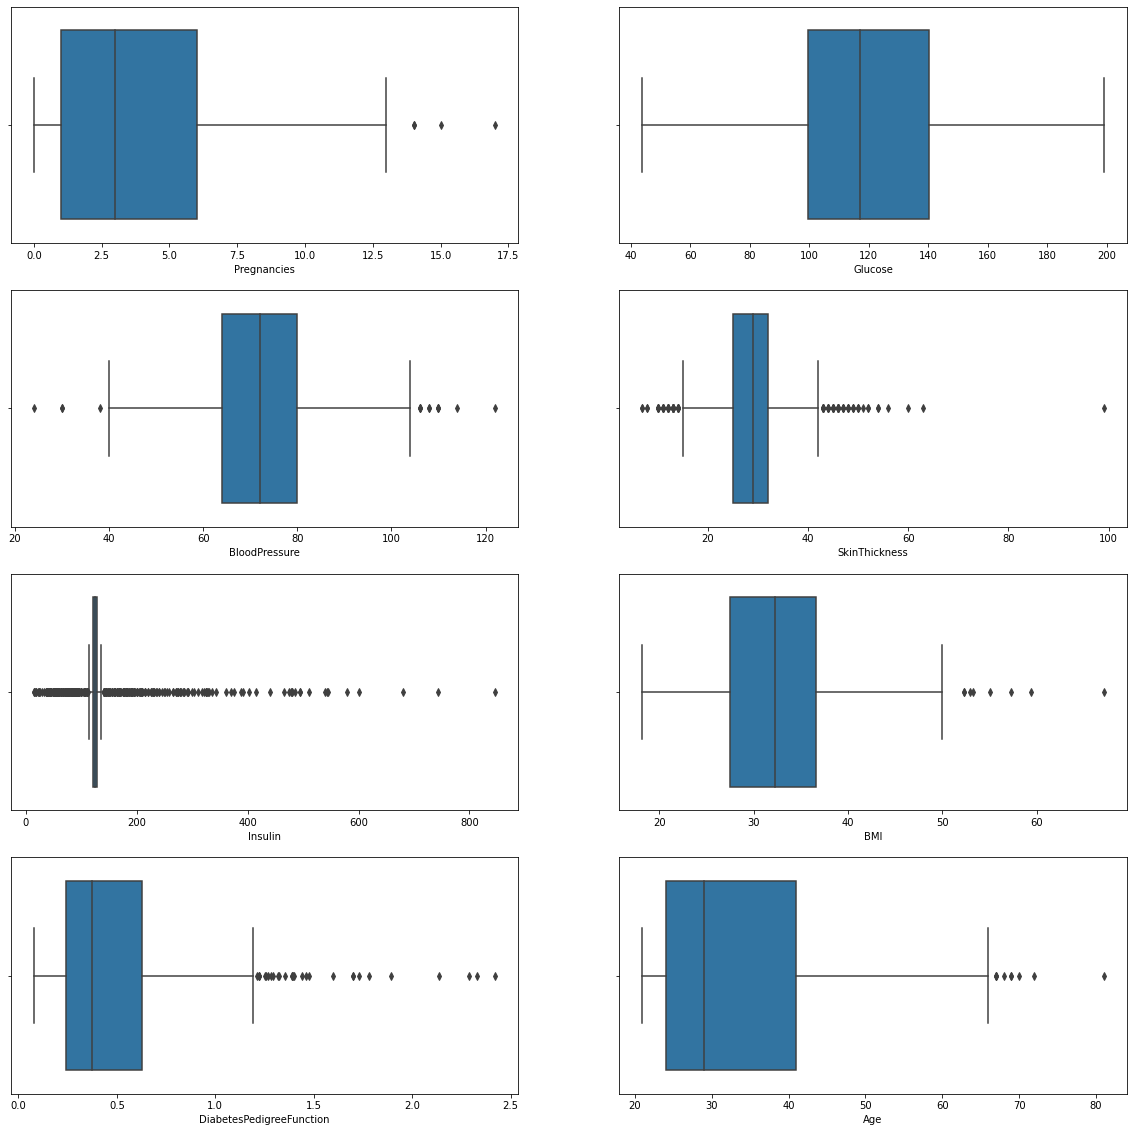

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))
axs = axs.flatten()
for i in range(len(df.columns)-1):
    sns.boxplot(data=df, x=df.columns[i], ax=axs[i])

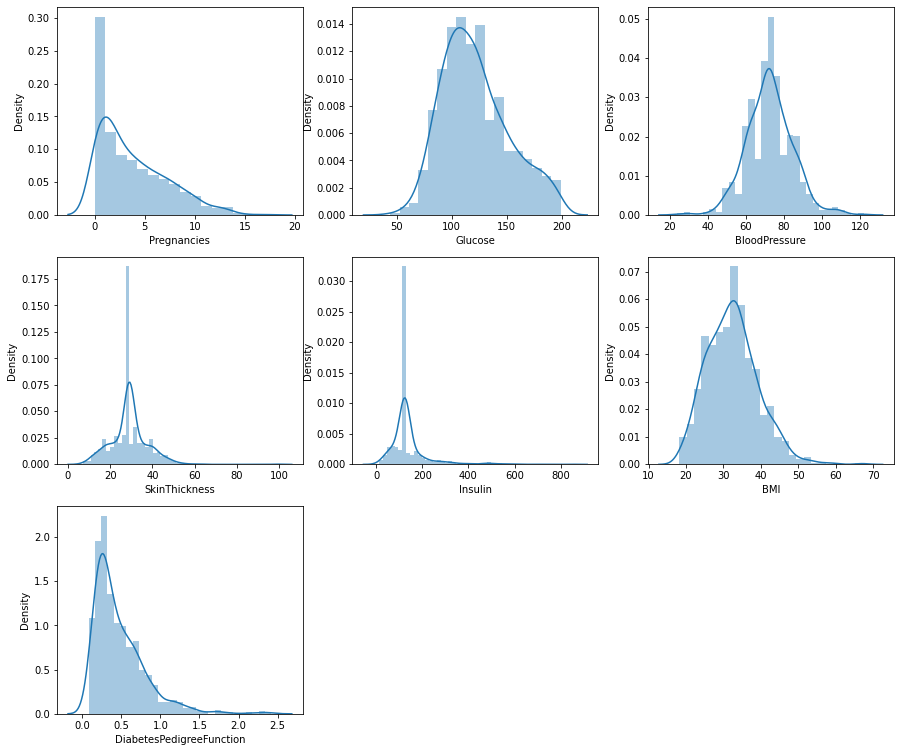

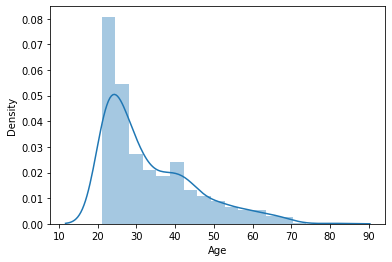

In [17]:
all_columns = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in all_columns[:-1]:
    plt.subplot(3,3,i)
    sns.distplot(df[column])
    i+=1
plt.show()

sns.distplot(df[all_columns[-1]])
plt.show()

In [18]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

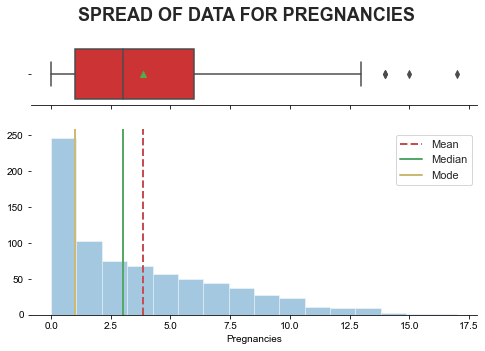

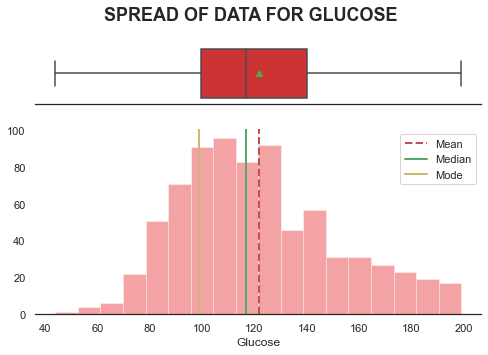

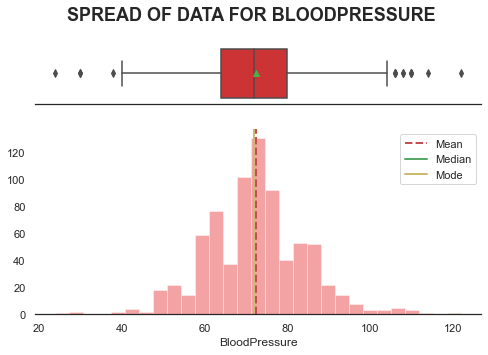

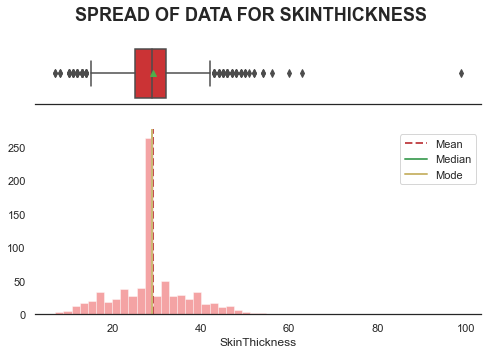

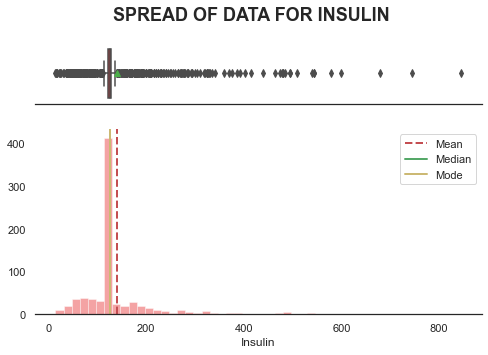

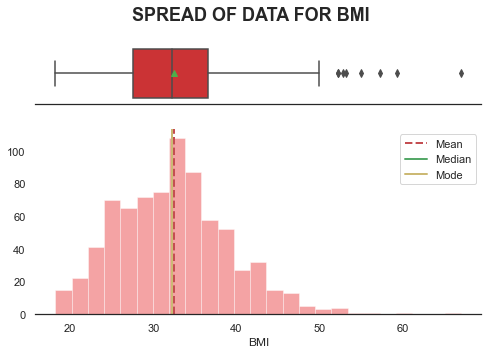

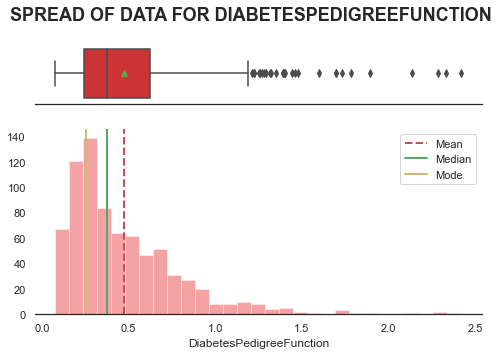

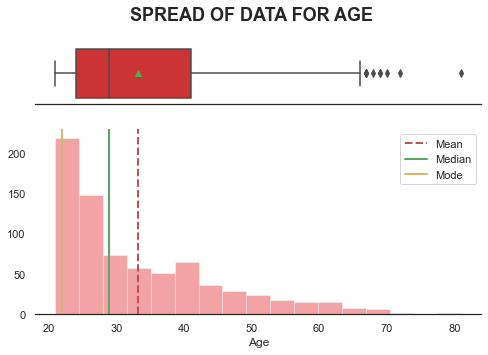

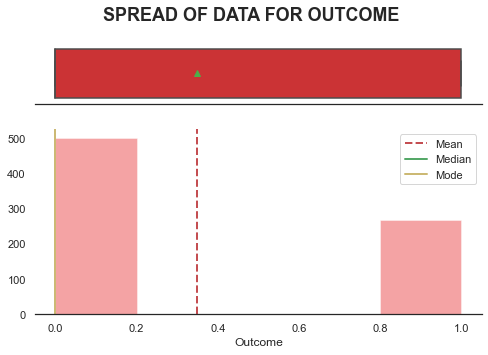

In [19]:
#select all quantitative columns for checking the spread
list_col= df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

* DIVIDING THE DATA INTO FEATURES AND LABELS

In [20]:
x=df.drop(columns = 'Outcome')
y = df[['Outcome']]

* SPLITTING THE DATA INTO TRAINING AND TESTING DATASET

In [21]:
# Splitting the data into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

* SCALING OF THE DATA

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [23]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [24]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

### IMPLEMENTAION OF MACHINE LEARNING ALGORITHMS

### LOGISTIC REGRESSION ALGORITHM

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg=LogisticRegression()

logreg.fit(x_train,y_train)

y_pred1=logreg.predict(x_test)

x = accuracy_score(y_test,y_pred1)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,y_pred1))

Logistic Regression's Accuracy is:  0.8428571428571429
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.75      0.71      0.73        21

    accuracy                           0.84        70
   macro avg       0.81      0.81      0.81        70
weighted avg       0.84      0.84      0.84        70



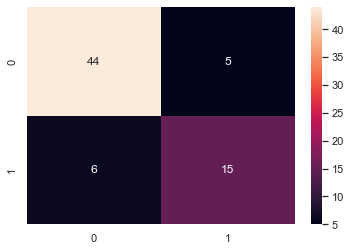

In [26]:
conf_matrix =  confusion_matrix(y_test,y_pred1)
plot= sns.heatmap(data=conf_matrix, annot=True)

### DECISION TREE ALGORITHM

In [27]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(x_train,y_train)

y_pred2 = DecisionTree.predict(x_test)
x = accuracy_score(y_test,y_pred2)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(y_test,y_pred2))

DecisionTrees's Accuracy is:  0.8714285714285714
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        49
           1       0.73      0.90      0.81        21

    accuracy                           0.87        70
   macro avg       0.84      0.88      0.86        70
weighted avg       0.89      0.87      0.87        70



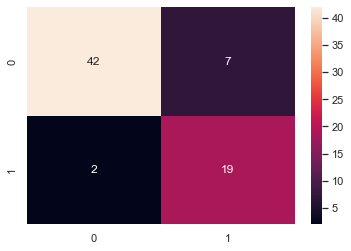

In [28]:
conf_matrix =  confusion_matrix(y_test,y_pred2)
plot= sns.heatmap(data=conf_matrix, annot=True)

### SUPPORT VECTOR MACHINE ALGORITHM

In [29]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(x_train,y_train)

y_pred3 = SVM.predict(x_test)

x = accuracy_score(y_test,y_pred3)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,y_pred3))

SVM's Accuracy is:  0.8428571428571429
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.75      0.71      0.73        21

    accuracy                           0.84        70
   macro avg       0.81      0.81      0.81        70
weighted avg       0.84      0.84      0.84        70



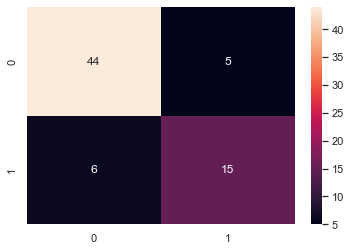

In [30]:
conf_matrix =  confusion_matrix(y_test,y_pred3)
plot= sns.heatmap(data=conf_matrix, annot=True)

### RANDOM FOREST ALGORITHM

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

y_pred4 = RF.predict(x_test)

x = accuracy_score(y_test,y_pred4)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,y_pred4))

RF's Accuracy is:  0.8142857142857143
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.72      0.62      0.67        21

    accuracy                           0.81        70
   macro avg       0.78      0.76      0.77        70
weighted avg       0.81      0.81      0.81        70



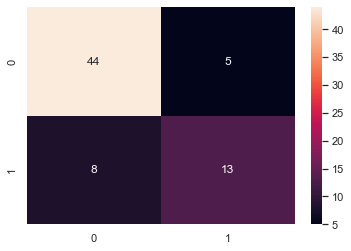

In [32]:
conf_matrix =  confusion_matrix(y_test,y_pred4)
plot= sns.heatmap(data=conf_matrix, annot=True)

### GAUSSIAN NAIVE BAYES ALGORITHM

In [33]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

y_pred5 = NaiveBayes.predict(x_test)
x = accuracy_score(y_test,y_pred5)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,y_pred5))

Naive Bayes's Accuracy is:  0.8
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        49
           1       0.64      0.76      0.70        21

    accuracy                           0.80        70
   macro avg       0.76      0.79      0.77        70
weighted avg       0.81      0.80      0.80        70



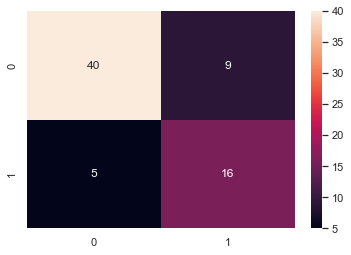

In [34]:
conf_matrix =  confusion_matrix(y_test,y_pred5)
plot= sns.heatmap(data=conf_matrix, annot=True)

### K-NEAREST NEIGHBORS CLASSIFIER

In [35]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred6=KNN.predict(x_test)

x = accuracy_score(y_test,y_pred6)
acc.append(x)
model.append('KNN')
print("K-nearest neighbors Accuracy is: ", x)

print(classification_report(y_test,y_pred6))

K-nearest neighbors Accuracy is:  0.8428571428571429
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        49
           1       0.71      0.81      0.76        21

    accuracy                           0.84        70
   macro avg       0.81      0.83      0.82        70
weighted avg       0.85      0.84      0.85        70



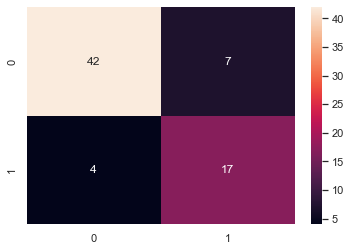

In [36]:
conf_matrix =  confusion_matrix(y_test,y_pred6)
plot= sns.heatmap(data=conf_matrix, annot=True)

### ACCURACY COMPARISION

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

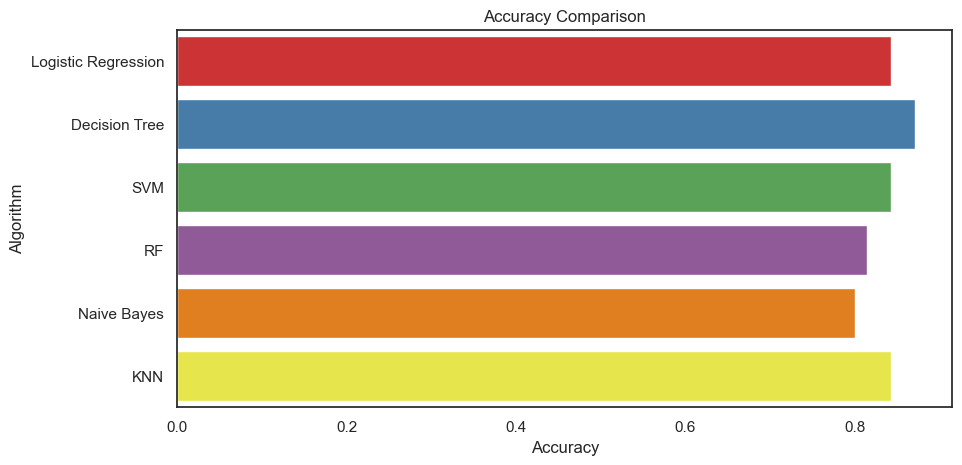

In [37]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model)

In [38]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.8428571428571429
Decision Tree --> 0.8714285714285714
SVM --> 0.8428571428571429
RF --> 0.8142857142857143
Naive Bayes --> 0.8
KNN --> 0.8428571428571429


### AUC-ROC CURVES FOR ALL ALGORITHMS

Text(0, 0.5, 'True positive rate')

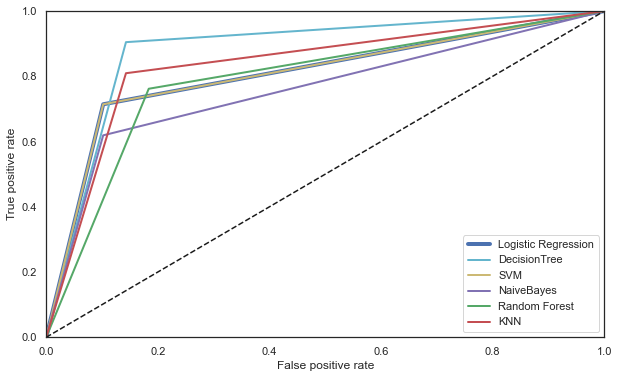

In [39]:
from sklearn.metrics import roc_curve

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test,y_pred1)
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(y_test,y_pred2)
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test,y_pred3)
fpr_NaiveBayes, tpr_NaiveBayes, thresholds_NaiveBayes = roc_curve(y_test,y_pred4)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test,y_pred5)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test,y_pred6)

plt.figure(figsize=(10,6))
plt.plot(fpr_logreg, tpr_logreg,linewidth=4,color='b')
plt.plot(fpr_DecisionTree, tpr_DecisionTree,linewidth=2, color='c')
plt.plot(fpr_SVM, tpr_SVM, linewidth=2, color='y')
plt.plot(fpr_NaiveBayes, tpr_NaiveBayes, linewidth=2, color='m')
plt.plot(fpr_RF, tpr_RF, linewidth=2, color='g')
plt.plot(fpr_KNN, tpr_KNN, linewidth=2, color='r')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.legend(['Logistic Regression','DecisionTree','SVM','NaiveBayes' ,'Random Forest', 'KNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### MAKING PREDICTIONS:

In [40]:
data = np.array([[2,197,70,45,543,35,0.158,53]])
prediction = logreg.predict(data)
print(prediction)

[1]


In [41]:
data = np.array([[1,97,66,15,140,23,0.487,22]])
prediction = RF.predict(data)
print(prediction)

[1]


In [42]:
data = np.array([[4,117,60,25,243,15,0.118,13]])
prediction = DecisionTree.predict(data)
print(prediction)

[0]


In [43]:
data = np.array([[6,197,40,25,143,35,0.238,43]])
prediction = SVM.predict(data)
print(prediction)

[0]


In [44]:
data = np.array([[2,107,40,55,413,25,0.158,53]])
prediction = KNN.predict(data)
print(prediction)

[1]


In [45]:
data = np.array([[4,127,37,54,343,35,0.178,53]])
prediction = NaiveBayes.predict(data)
print(prediction)

[1]


### CONCLUSION

* The Machine Learning Algorithms which gave Best Accuracy is: Decision Tree(Accuracy is 87.14%)

### PROJECT COMPLETED BY
### SUNKAVALLI TULASI
### ML-MAJOR-JUNE